In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./data/Heart.csv", index_col = 0)
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


<AxesSubplot:xlabel='AHD', ylabel='count'>

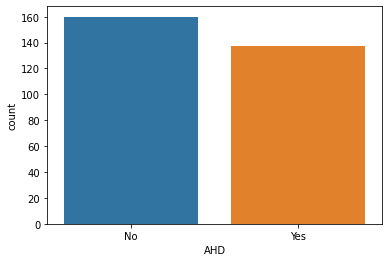

In [2]:
df.dropna(inplace=True)

sns.countplot(data = df, x = "AHD")

In [5]:
from sklearn.model_selection import train_test_split


df_dummies = pd.get_dummies(df, drop_first= True)
X, y = df_dummies.drop("AHD_Yes", axis = 1), df_dummies["AHD_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=42)
X_train.shape, X_test.shape

((237, 16), (60, 16))

In [7]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=uint8)

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators" : [50, 100, 150, 200, 300],
             "criterion" : ["gini", "entropy"],
             "max_features": ["auto", "sqrt", "log2"]
}

clf = GridSearchCV(RandomForestClassifier(), param_grid= param_grid, cv = 4, verbose =1, scoring = "recall")

clf.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 300]},
             scoring='recall', verbose=1)

In [9]:
clf.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.81      0.88      0.84        24

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.86        60
weighted avg       0.87      0.87      0.87        60



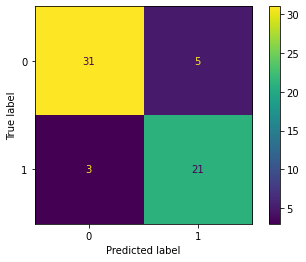

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_tned = clf.predict(X_test)

print(classification_report(y_test, y_pred_tned))

cm = confusion_matrix(y_test, y_pred_tned)
ConfusionMatrixDisplay(cm).plot()

#recall = TP/(TP+FN)

In [12]:
model_rf.feature_importances_, model_rf.feature_importances_.sum()

(array([0.08839598, 0.03404896, 0.08362822, 0.09486928, 0.01300379,
        0.02115667, 0.12223509, 0.05525256, 0.11696637, 0.03096116,
        0.14055381, 0.03680003, 0.00910466, 0.01581684, 0.07399679,
        0.06320981]),
 0.9999999999999999)

<AxesSubplot:xlabel='importance', ylabel='Feature'>

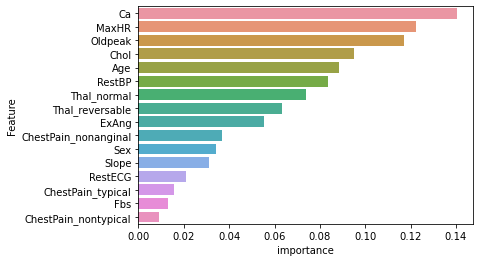

In [19]:
feature_importance = pd.DataFrame([X.columns, model_rf.feature_importances_]).T
feature_importance.columns = ["Feature", "importance"]
feature_importance.sort_values(by = "importance", ascending= False, inplace = True)
sns.barplot(data = feature_importance, y= "Feature", x= "importance")